# Image processing with Python

[Original course is here.](https://datacarpentry.org/image-processing/)
[GitHub source code](https://github.com/datacarpentry/image-processing) of the original course.
[Second source.](https://github.com/foobar167/junkyard)


## Preparations
[Get your monitor DPI here.](https://www.infobyip.com/detectmonitordpi.php)

In [17]:
my_dpi = 144

In [18]:
import cv2
import numpy as np

from matplotlib import pyplot as plt


def get_size(image):
    """Return image size in inches"""
    size = image.shape[1::-1]  # image size in pixels
    return tuple(map(lambda x: int(x / my_dpi), size))


def get_image(name):
    """Get image from path"""
    image = cv2.imread(name)  # read image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # covert BGR to RGB
    return image


def get_gray(name):
    """Get gray image from path"""
    image = cv2.imread(name)  # read image
    # Conver BGR to gray
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    return image


def show_image(image, size=(10, 10)):
    """SHow image in Jupyter Nptebook"""
    plt.rcParams['figure.dpi'] = my_dpi  # set DPI
    plt.figure(figsize=size)  # set image size in inches
    plt.xticks([])  # hide x axis values
    plt.yticks([])  # hide y axis values
    plt.imshow(image)
    plt.show()


def show_hist(name, size=(10, 10)):
    """Show histogram from image path"""
    image = get_image(name)
    plt.rcParams['figure.dpi'] = my_dpi # set DPI
    plt.figure(figsize=size) # set size in inches
    plt.hist(image.ravel(), bins=range(256), range=(0,1))
    plt.show()

def show_np_hist(image):
    """Display histogram"""
    histogram, bin_edges = np.histogram(image, bins=range(256), range=(0,1))
    # Configure and draw the histogram figure
    plt.figure()
    plt.title("Grayscale Histogram")
    plt.xlabel("grayscale value")
    plt.ylabel("pixels")
    plt.plot(histogram)
    plt.show()

In [59]:
# Create pathes for images
import os
imgs = os.path.join(os.getcwd(), "data/image_processing") # directory with images
temp = os.path.join(os.getcwd(), "temp") # directory with temporary images
img1 = os.path.join(imgs, "dice_contours_1.jpg")
img2 = os.path.join(imgs, "dice_contours_2.jpg")
img3 = os.path.join(imgs, "shapes-01.jpg")
img4 = os.path.join(imgs, "beads.jpg")
img5 = os.path.join(imgs, "chair.jpg")
img6 = os.path.join(imgs, "remote-control.jpg")
img7 = os.path.join(imgs, "plant-seedling.jpg")


# Read, display and save image

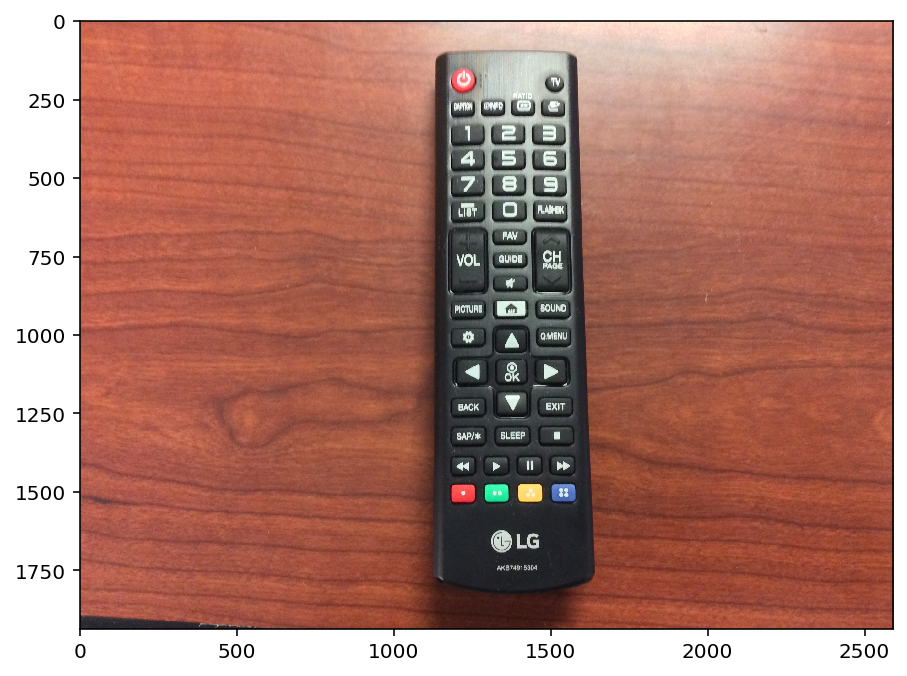

Image has shape: (1936, 2592, 3)
Small image has shape: (968, 1296, 3)


In [65]:
import warnings
from skimage import io, transform, img_as_ubyte


# Read image
image = io.imread(fname=img6)

# Display image
io.imshow(image)
plt.show()

# Resize the image
print("Image has shape:", image.shape)
new_shape = (image.shape[0] >> 1, image.shape[1] >> 1, image.shape[2])
small = transform.resize(image=image, output_shape=new_shape)
print("Small image has shape:", small.shape)

# UserWarning: Possible precision loss then converting from float64 to uint8
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Save a new version in .tif format
    io.imsave(fname=os.path.join(temp, "remote-control2.tif"), arr=img_as_ubyte(small))

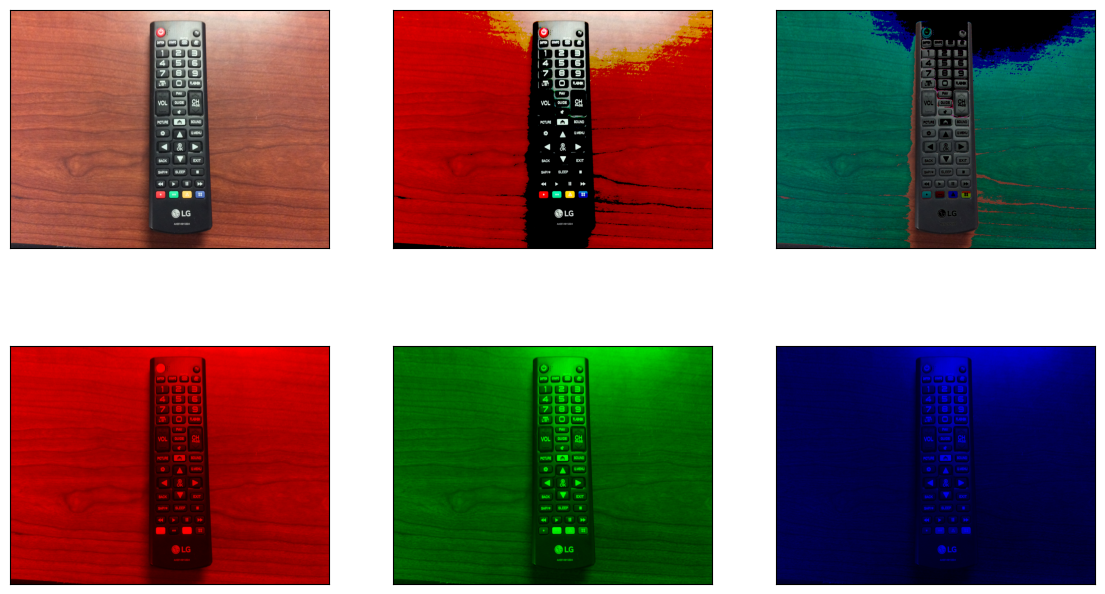

In [58]:
i = image.copy()
j = image.copy()
r = image.copy()
g = image.copy()
b = image.copy()
i[i < 128] = 0 # keep only high-intensity pixels
j[j > 128] = 0 # keep only low-intensity pixels
r[:,:,1] = 0
r[:,:,2] = 0
g[:,:,0] = 0
g[:,:,2] = 0
b[:,:,0] = 0
b[:,:,1] = 0

plt.figure(figsize=(14, 8))

ax = plt.subplot(231)
ax.yaxis.set_major_locator(plt.NullLocator()) # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator())
plt.imshow(image)

ax = plt.subplot(232)
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_locator(plt.NullLocator())
plt.imshow(i)

ax = plt.subplot(233)
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_locator(plt.NullLocator())
plt.imshow(j)

ax = plt.subplot(234)
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_locator(plt.NullLocator())
plt.imshow(r)

ax = plt.subplot(235)
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_locator(plt.NullLocator())
plt.imshow(g)

ax = plt.subplot(236)
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_locator(plt.NullLocator())
plt.imshow(b)

plt.show()

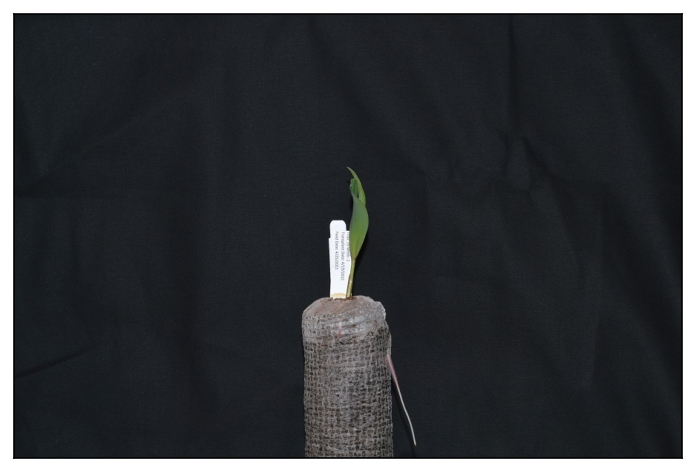

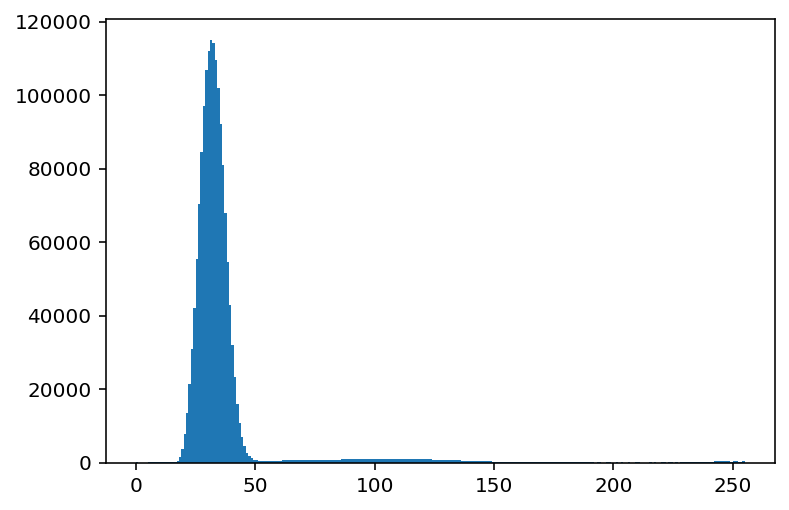

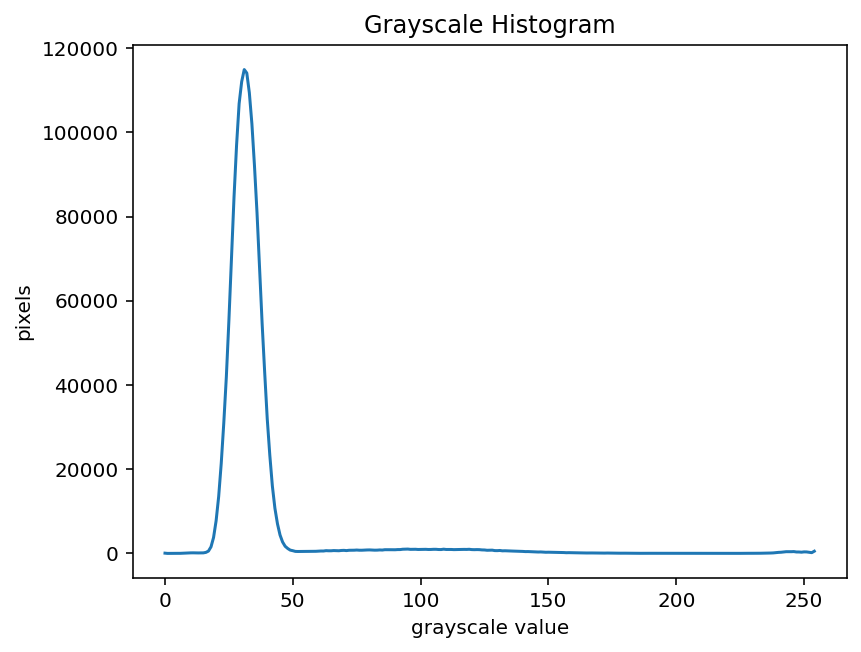

In [62]:
image = get_image(img7)
size = (6, 4)
show_image(image, size)
show_hist(img7, size)
show_np_hist(image)

# Thresholding

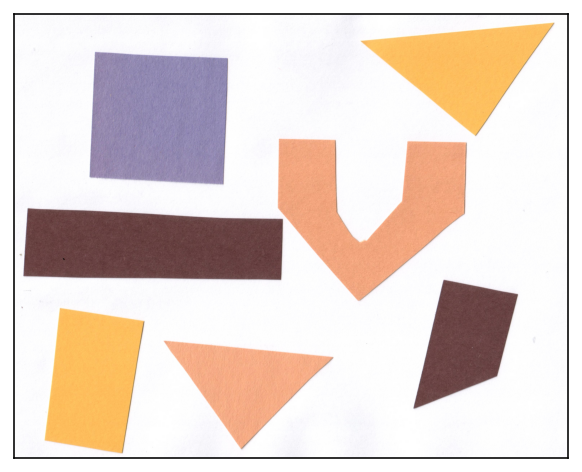

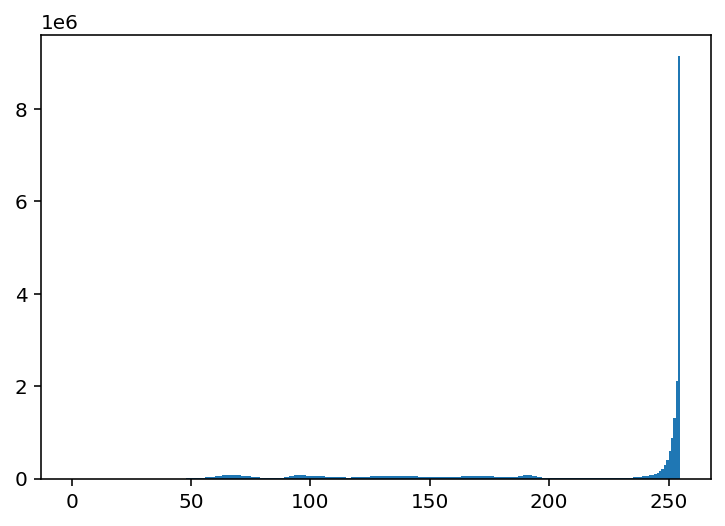

In [63]:
size = (6, 4)
image = get_image(img3)
show_image(image, size)
show_hist(img3, size)

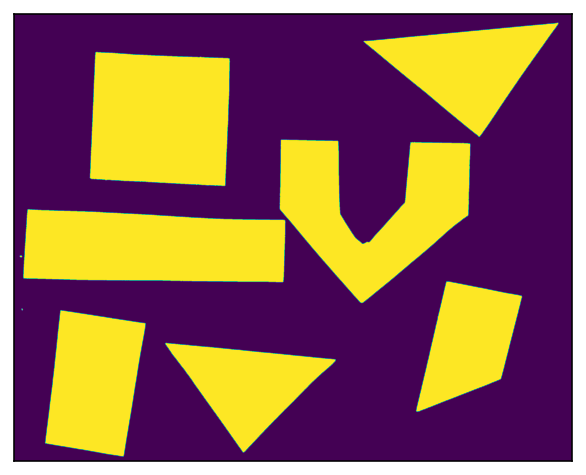

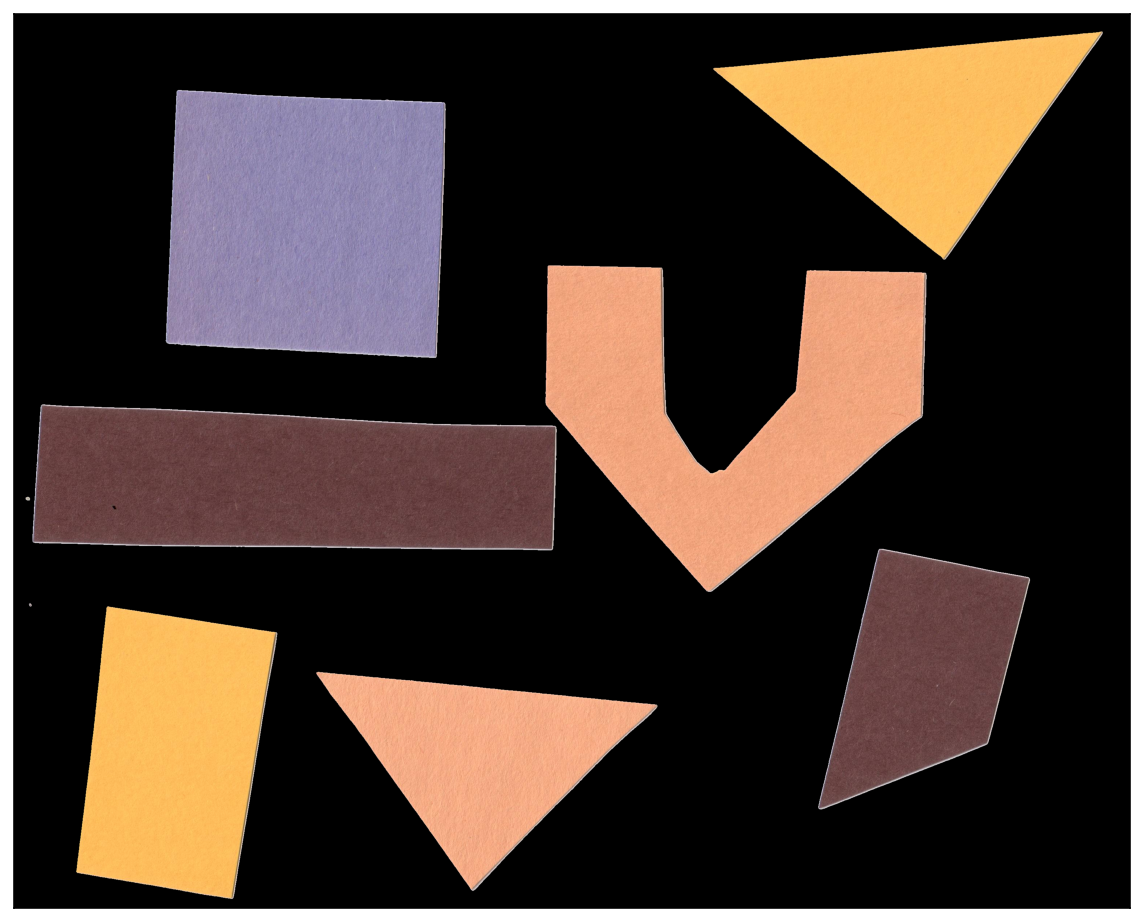

In [64]:
import skimage

# Set constants
threshold = 220 / 255
sigma = 2

# Blur and grayscale before thresholding
blur = skimage.color.rgb2gray(image)
blur = skimage.filters.gaussian(blur, sigma=sigma)

# Perform inverse binary thresholding
mask = blur < threshold

# Use mask to select the "interesting" part of the image
select = np.zeros_like(image)
select[mask] = image[mask]

# Display the result
show_image(mask, (5, 5))
show_image(select, (10, 10))